## Análisis de accidentes - Buses

### Area metropolitana del Valle de Aburrá

Manuela Cordoba

Alejandro Fernandez

Ana María Jaramillo

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from imblearn.combine import *
import config

In [15]:
dataset_for_spatial_analysis = pd.read_csv(config.DATASET_WITH_SPATIAL_INFO)

In [16]:
dataset_for_spatial_analysis.columns

Index(['geoco_type', 'severity', 'month', 'day', 'area_code',
       'user_category_code', 'subcategory', 'hierarchy', 'road_class',
       'stratum', 'accident_type', 'vehicle_class', 'service_type', 'brand',
       'model', 'zone', 'design', 'driver_age', 'gender', 'weekday', 'hour',
       'GiZScore_Count', 'GiPValue_Count', 'GiZScore_Severity',
       'GiPValue_Severity', 'NNeighbors_Severity', 'LMiIndex_Anselin_Count',
       'LMiZScore_Anselin_Count', 'LMiPValue_Anselin_Count',
       'COType_Anselin_Count', 'NNeighbors_Anselin_Count',
       'SpatialLag_Anselin_Count', 'LMiIndex_Anselin_Sev',
       'LMiZScore_Anselin_Sev', 'COType_Anselin_Sev',
       'ZTransform_Anselin_Sev'],
      dtype='object')

In [17]:
# List of columns to remove
columns_from_spatial_analysis = [
    'GiZScore_Count', 'GiPValue_Count',
    'GiZScore_Severity', 'GiPValue_Severity', 'NNeighbors_Severity',
    'LMiIndex_Anselin_Count', 'LMiZScore_Anselin_Count',
    'LMiPValue_Anselin_Count', 'COType_Anselin_Count',
    'NNeighbors_Anselin_Count', 'SpatialLag_Anselin_Count',
    'LMiIndex_Anselin_Sev', 'LMiZScore_Anselin_Sev', 'COType_Anselin_Sev',
    'ZTransform_Anselin_Sev'
]

# Drop the columns from the dataset
dataset_without_spatial_analysis = dataset_for_spatial_analysis.drop(columns=columns_from_spatial_analysis)

In [18]:
dataset_without_spatial_analysis.columns

Index(['geoco_type', 'severity', 'month', 'day', 'area_code',
       'user_category_code', 'subcategory', 'hierarchy', 'road_class',
       'stratum', 'accident_type', 'vehicle_class', 'service_type', 'brand',
       'model', 'zone', 'design', 'driver_age', 'gender', 'weekday', 'hour'],
      dtype='object')

In [19]:
columns_list = [col for col in dataset_without_spatial_analysis.columns if col != 'severity']

# Separate numeric and string columns
numeric_columns = []
string_columns = []

# Check if each column is numeric or contains strings
for col in columns_list:
    if pd.to_numeric(dataset_without_spatial_analysis[col], errors='coerce').notnull().all():
        numeric_columns.append(col)
    else:
        string_columns.append(col)

# Print numeric and string columns
print("Numeric Columns:", numeric_columns)
print("String Columns:", string_columns)

Numeric Columns: ['month', 'day', 'user_category_code', 'hierarchy', 'road_class', 'stratum', 'model', 'driver_age', 'hour']
String Columns: ['geoco_type', 'area_code', 'subcategory', 'accident_type', 'vehicle_class', 'service_type', 'brand', 'zone', 'design', 'gender', 'weekday']


In [20]:
# Remove 'month' and 'day' from the numeric columns list
numeric_columns.remove('month')
numeric_columns.remove('day')

# Add 'month' and 'day' to the string columns list
string_columns.extend(['month', 'day'])

# Print numeric and string columns
print("Numeric Columns:", numeric_columns)
print("String Columns:", string_columns)

Numeric Columns: ['user_category_code', 'hierarchy', 'road_class', 'stratum', 'model', 'driver_age', 'hour']
String Columns: ['geoco_type', 'area_code', 'subcategory', 'accident_type', 'vehicle_class', 'service_type', 'brand', 'zone', 'design', 'gender', 'weekday', 'month', 'day']


In [21]:
# Get unique values in the 'severity' column
dataset_without_spatial_analysis['severity'].unique()

array(['injured', 'material_damage_only', 'fatality'], dtype=object)

In [22]:
# Replace 'fatality' with 'injured'
dataset_without_spatial_analysis['severity'] = dataset_without_spatial_analysis['severity'].replace('fatality', 'injured')

# Verify the changes by checking unique values again
unique_values_after = dataset_without_spatial_analysis['severity'].unique()
print("Unique values after replacement:", unique_values_after)

Unique values after replacement: ['injured' 'material_damage_only']


In [23]:
dataset_without_spatial_analysis['severity'].value_counts(normalize=True)

severity
material_damage_only    0.752566
injured                 0.247434
Name: proportion, dtype: float64

In [24]:
# Setup the model with manual data type specification
setup(data=dataset_without_spatial_analysis, 
      target='severity', 
      fix_imbalance=True, 
      session_id=2023,
      normalize = True,
      data_split_stratify = True,
      fold_strategy = 'stratifiedkfold',
      numeric_features=numeric_columns,
      categorical_features=string_columns)#,
      #ignore_features=['clase_acci'],
      #normalize_method="zscore",
      #transformation=True)

,Description,Value
0,Session id,2023
1,Target,severity
2,Target type,Binary
3,Target mapping,"injured: 0, material_damage_only: 1"
4,Original data shape,"(79112, 21)"
5,Transformed data shape,"(107086, 105)"
6,Transformed train set shape,"(83352, 105)"
7,Transformed test set shape,"(23734, 105)"
8,Numeric features,7
9,Categorical features,13


In [25]:
train_model = compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8558,0.8509,0.8558,0.8514,0.8453,0.5649,0.5827,1.3500
rf,Random Forest Classifier,0.8558,0.8440,0.8558,0.8510,0.8458,0.5668,0.5831,2.5330
gbc,Gradient Boosting Classifier,0.8537,0.8407,0.8537,0.8483,0.8438,0.5613,0.5768,5.2850
et,Extra Trees Classifier,0.8521,0.8358,0.8521,0.8462,0.8427,0.5592,0.5729,4.0470
ada,Ada Boost Classifier,0.8518,0.8334,0.8518,0.8459,0.8422,0.5577,0.5717,1.8250
svm,SVM - Linear Kernel,0.8502,0.8162,0.8502,0.8439,0.8417,0.5577,0.5692,0.9680
ridge,Ridge Classifier,0.8411,0.8386,0.8411,0.8350,0.8365,0.5507,0.5538,0.6890
lda,Linear Discriminant Analysis,0.8411,0.8386,0.8411,0.8350,0.8365,0.5507,0.5538,1.1370
lr,Logistic Regression,0.8344,0.8391,0.8344,0.8302,0.8318,0.5419,0.5430,2.2320
nb,Naive Bayes,0.7437,0.8063,0.7437,0.7978,0.7483,0.4115,0.4313,0.7250


In [26]:
best = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8528,0.8495,0.8528,0.8476,0.8425,0.5574,0.5740
1,0.8579,0.8514,0.8579,0.8536,0.8479,0.5726,0.5896
2,0.8619,0.8605,0.8619,0.8577,0.8530,0.5877,0.6025
3,0.8564,0.8573,0.8564,0.8520,0.8462,0.5673,0.5847
4,0.8583,0.8528,0.8583,0.8541,0.8482,0.5732,0.5904
5,0.8483,0.8425,0.8483,0.8428,0.8367,0.5399,0.5586
6,0.8492,0.8480,0.8492,0.8442,0.8373,0.5413,0.5610
7,0.8602,0.8509,0.8602,0.8570,0.8498,0.5770,0.5961
8,0.8564,0.8483,0.8564,0.8523,0.8458,0.5659,0.5843


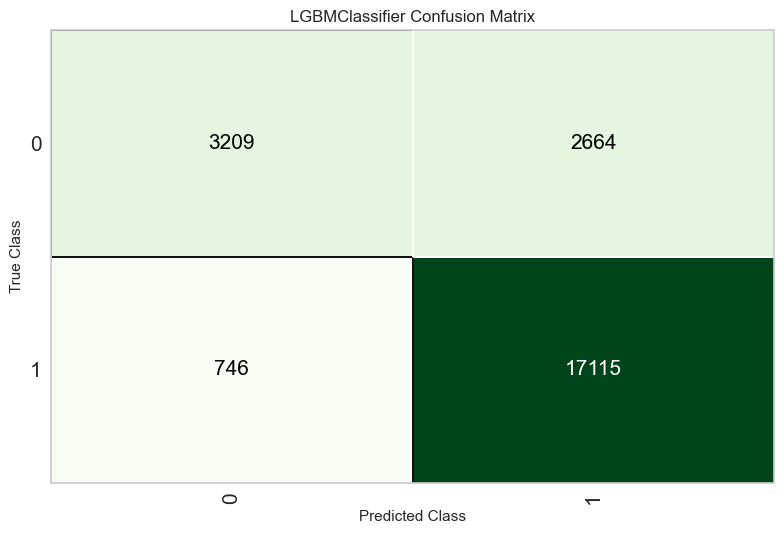

In [27]:
plot_model(best, plot = 'confusion_matrix')

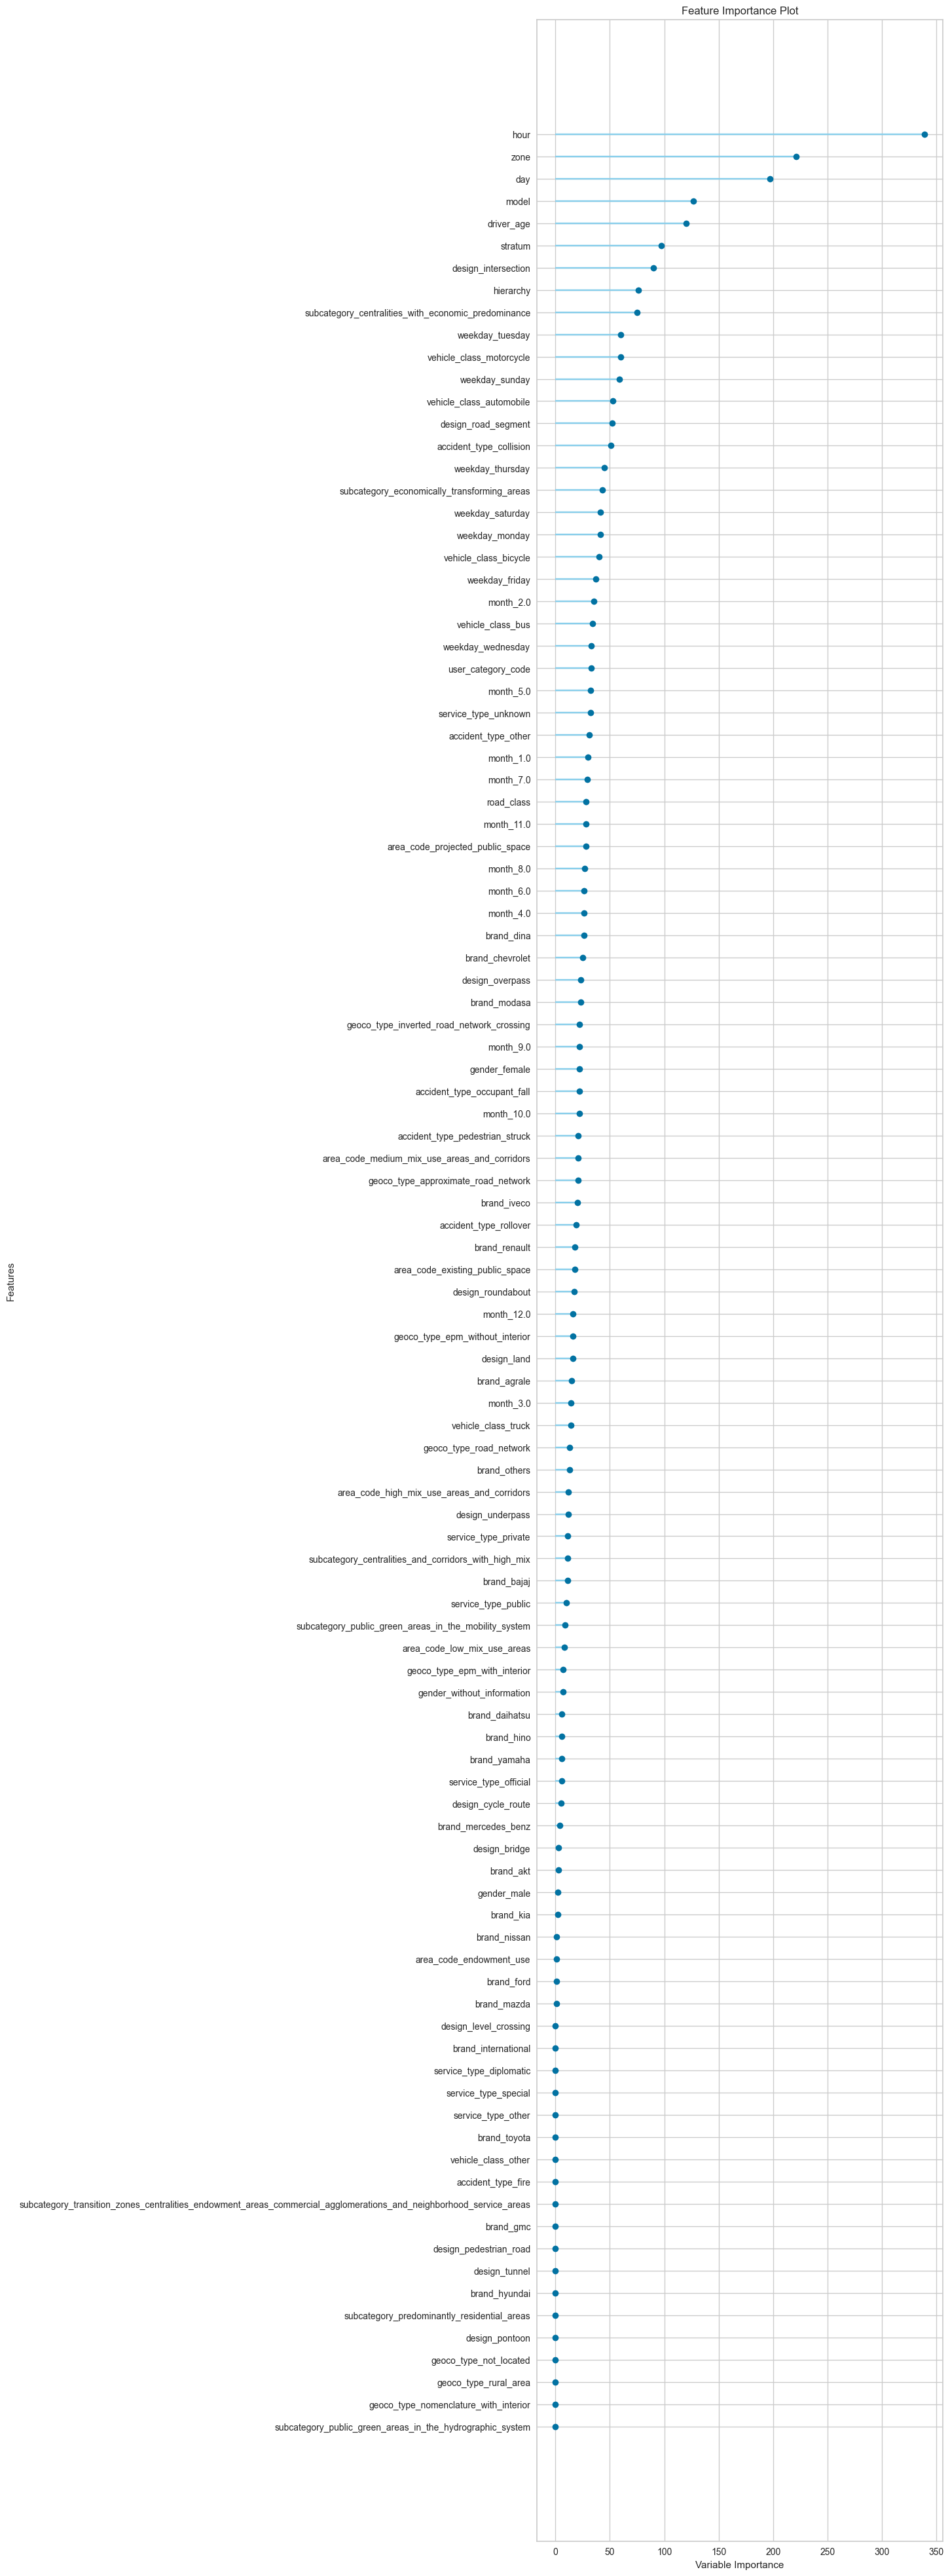

In [28]:
# Visualize feature importance
plot_model(best, plot='feature_all')